**DeapSECURE module 2: Dealing with Big Data**

# Session 1: Fundamentals of Pandas

Welcome to the DeapSECURE online training program!
This is a Jupyter notebook for the hands-on learning activities of the
["Big Data" module](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/),
Episode 3: ["Fundamentals of Pandas"](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html).
Please visit the [DeapSECURE](https://deapsecure.gitlab.io/) website to learn more about our training program.

<a id="TOC"></a>
**Quick Links** (sections of this notebook):

* 1 [Setup](#sec-Setup)
* 2 [Series](#sec-Series)
* 3 [DataFrame](#sec-DataFrame)
  - [Loading Sherlock dataset](#sec-Sherlock-load-tiny)
  - [Accessing Elements (Indexing)](#sec-DataFrame-indexing)
  - [Exercises](#sec-DataFrame-exercises)
* 4 [Visualization](#sec-Visualization)
* 5 [Summary & Further Resources](#sec-Summary)

<a id="sec-Setup"></a>
## 1. Setup Instructions

If you are opening this notebook from Wahab cluster's OnDemand interface, you're all set.

If you see this notebook elsewhere and want to perform the exercises on Wahab cluster, please follow the steps outlined in our setup procedure.

1. Make sure you have activated your HPC service.
2. Point your web browser to https://ondemand.wahab.hpc.odu.edu/ and sign in with your MIDAS ID and password.
3. Create a new Jupyter session with the following parameters: Python version **3.7**, Python suite `tensorflow 2.6 + pytorch 1.10`, Number of Cores **1**, Number of GPU **0**, Partition `main`, and Number of Hours at least **4**. (See <a href="https://wiki.hpc.odu.edu/en/ood-jupyter" target="_blank">ODU HPC wiki</a> for more detailed help.)
4. From the JupyterLab launcher, start a new Terminal session. Then issue the following commands to get the necessary files:

       mkdir -p ~/CItraining/module-bd
       cp -pr /shared/DeapSECURE/module-bd/. ~/CItraining/module-bd

Using the file manager on the left sidebar, now change the working directory to `~/CItraining/module-bd`.
The file name of this notebook is `BigData-session-1.ipynb`.

### 1.1 Reminder

* Throughout this notebook, `#TODO` is used as a placeholder where you need to fill in with something appropriate. 
* To run a code in a cell, press `Shift+Enter`.
* Use `ls` to view the contents of a directory.

### 1.2 Loading Python Libraries

Now, we need to **import** the required libraries into this Jupyter notebook:
`pandas`, `numpy`, `matplotlib` and `seaborn`.
For `matplotlib`, we only need to load a submodule called `pyplot`.

In [1]:
!pip install seaborn

In [1]:
"""Uncomment, edit, and run code below to import libraries listed above.""";
import pandas, numpy, matplotlib
import seaborn
from matplotlib import pyplot
# import #TODO
%matplotlib inline

The last line is an ipython magic command to ensure that plots are rendered inline.

> If the cell above results in an error like `ModuleNotFoundError: No module named 'seaborn'`,
> please create a new cell *before* the `import...` cell above, and run the following command:
> ```
> ! pip install seaborn
> ```
>
> After seaborn is installed, then rerun the `import...` cell.

## Data in Pandas: `Series` and `DataFrame`

<table style="width:100%">
    <tr>
        <th style="width:33%">Series</th>
        <th style="width:67%">DataFrame</th>
    </tr>
    <tr>
        <td>1-D labeled array of values</td>
        <td>2-D tabular data with row and column labels</td>
    </tr>
    <tr>
        <td><img src="fig/Series.png"></td>
        <td><img src="fig/DataFrame.png"></td>
    </tr>
    <tr>
        <td>
            Properties: <b>labels</b>, <b>values</b>, <b>data type</b>
       </td>
        <td>
            Properties: <b>(row) labels</b>, <b>column names</b>,
            <b>values</b>, <b>data type</b>
       </td>
    </tr>
</table>

<a id="sec-Series"></a>
## 2. Working with `Series`

Pandas stores data in the form of `Series` and `DataFrame` objects.
We will learn about both in this section.

A Series object is a one-dimensional array of values of same datatype. A Series is capable of holding any datatype (integers, strings, float, and many others).

#### 2.1 Creating a `Series` Object

A Series object can be created by feeding an input list to `pandas.Series` function.
Let's create a series containing ten measurements of CPU loads:

In [4]:
"""Create a pandas series object named CPU_USAGE:""";

CPU_USAGE = pandas.Series([0.16, 0.07, 0.23, 0.24, 0.14, 4.99, 0.23, 0.47, 0.46, 0.17])

In [5]:
"""Print the contents of CPU_USAGE""";

print(CPU_USAGE)

0    0.16
1    0.07
2    0.23
3    0.24
4    0.14
5    4.99
6    0.23
7    0.47
8    0.46
9    0.17
dtype: float64


The printout of `CPU_USAGE` shows the three key elements of a Series:
**values**, **labels** (*index*), and **data type**. 

**QUESTION:** Can you identify these elements from the output above?

By default, the index of a `Series` is a sequence of integers starting from 0.
This follows the standard convention in Python for numbering array elements.

In [7]:
"""Hint: In a Jupyter notebook, you can also display the value of
an object by simply typing its name and pressing Shift+Enter:"""

CPU_USAGE

0    0.16
1    0.07
2    0.23
3    0.24
4    0.14
5    4.99
6    0.23
7    0.47
8    0.46
9    0.17
dtype: float64

The `len()` function returns the number of elements in the `Series` object, similiar to `list` or `dict` in Python.

In [6]:
"""Print the length of the CPU_USAGE Series:""";

print(len(CPU_USAGE))

10


(There are many other ways to create series, such as from a Numpy array. Visit [lesson website](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html) for more detail).

### 2.2 Accessing Elements in a `Series`

#### 2.2.1 Accessing a Single Element

An element can be accessed by specifying its *label* in a square bracket notation, for example: `CPU_USAGE[3]`,
where `3` is the *label*.

In [7]:
"""Also try several values of the label instead of 3:""";

print(CPU_USAGE[0])
print(CPU_USAGE[1])
print(CPU_USAGE[3])

0.16
0.07
0.24


**Series with an irregular index**: We will encounter many series with index that is not a regular sequence like `0, 1, 2, 3, ...`. As an example, let's create a `Series` named `MEM_USAGE` which has an irregular index:

In [8]:
"""Run to create a Series object named MEM_USAGE:"""

MEM_USAGE = pandas.Series([0.16, 0.07, 0.23, 0.24, 0.14],
                          index=[3, 1, 4, 2, 7])
print(MEM_USAGE)

3    0.16
1    0.07
4    0.23
2    0.24
7    0.14
dtype: float64


**QUESTIONS**:

* Anything different from the previously defined `CPU_USAGE`?
* What is `MEM_USAGE[3]`?
* What is `MEM_USAGE[4]`?
* Based on the observations above, what is the meaning of the subscript in the indexing operator, `[]`, for a Series object?

In [9]:
"""Use this cell to answer those questions""";
MEM_USAGE[4]
MEM_USAGE[3]


0.16

#### 2.2.1 Accessing a Subset of a Series

An array of labels (like `[1,3]`) can be fed to the indexing operator to retrieve multiple values from a `Series`.

In [10]:
"""Uncomment and modify to get the values of MEM_USAGE corresponding to labels 1 and 3""";

print(MEM_USAGE[[1,3]])

1    0.07
3    0.16
dtype: float64


**QUESTION**: Try out other combinations of labels and observe the returned value.

In [16]:
print(MEM_USAGE[[1,2]])

1    0.07
2    0.24
dtype: float64


**BOOLEAN-VALUED INDEXING**

Accessing a `Series` with an array of boolean values (`True` or `False`) is a special case: The indexing operation acts as a "row selector", where the True values will select the corresponding elements. *(Note: generally, the length of the boolean array is the same as the length of the `Series` object)*

In [11]:
"""Select elements of MEM_USAGE using boolean arrays """;

print(MEM_USAGE[[True, False, False, True, True]])

3    0.16
2    0.24
7    0.14
dtype: float64


### 2.3 Updating Elements in a `Series`

At times we need to modify certain elements in a `Series` or a `DataFrame`.
This is accomplished by the use of `.loc[]` subscript operator, which can read or update one or more elements corresponding to the specified labels.

Here is an example for a single-element update:

In [12]:
print("Before update:")
print(MEM_USAGE[7])
print(MEM_USAGE.loc[7])

Before update:
0.14
0.14


In [14]:
"""Updating an element with the .loc[] operator"""
MEM_USAGE.loc[7] = 0.33
print("After update:")
print(MEM_USAGE.loc[7])
# print(MEM_USAGE)

After update:
0.33


**EXERCISE**: Update the element with label `1` to a new value, `1.10`.

Here is an example for updating multiple elements:

In [15]:
MEM_USAGE.loc[[1,3]] = [4, 2]
print(MEM_USAGE)

3    2.00
1    4.00
4    0.23
2    0.24
7    0.33
dtype: float64


Boolean-array subscripting can be used to selectively update a subset of values.

**EXERCISE**: Use the Boolean-array indexing to update the contents of `MEM_USAGE` according to this instruction:

```
Before update         After update
  3    2.00             3    1.00
  1    4.00             1    4.00
  4    0.23     ==>     4    0.23
  2    0.24             2    2.00
  7    0.33             3    3.00
```

(*HINT*: Note which rows are to be changed, and build the Boolean array accordingly as the subscript to the `.loc[]` operator. The contents before update above will be valid if you had executed every cells involving `MEM_USAGE` earlier.)

In [16]:
"""Modify multiple elements using boolean-array indexing""";
print("Before update:")
print(MEM_USAGE)

MEM_USAGE.loc[2] = 0.55
MEM_USAGE.loc[4] = 0.66

print("After update:")
print(MEM_USAGE)

Before update:
3    2.00
1    4.00
4    0.23
2    0.24
7    0.33
dtype: float64
After update:
3    2.00
1    4.00
4    0.66
2    0.55
7    0.33
dtype: float64


### 2.4 Creating a Copy

_pandas_ allows us to duplicate a Series (or later on, a DataFrame) so that we can alter the copy without messing the original, or vice versa.
Use the `copy` method to create a duplicate.

In [17]:
"""Create a copy of MEM_USAGE into a new variable called COPY_USAGE:""";

## Start with the original MEM_USAGE 
MEM_USAGE = pandas.Series([0.16, 0.07, 0.23, 0.24, 0.14],
                          index=[3, 1, 4, 2, 7])

COPY_USAGE = MEM_USAGE.copy()  # use the copy method

In [18]:
"""Now alter COPY_USAGE at index label `3` to a new value, 1.23""";
# COPY_USAGE[#TODO] = #TODO
print("Value in the copy:", COPY_USAGE[3])
print("Value in the original:", MEM_USAGE[3])

Value in the copy: 0.16
Value in the original: 0.16


Can't we create a copy using an assignment operator? Let us try that to see what happens:

In [20]:
"""The following code creates a copy of MEM_USAGE Series,
then modifies the copy. Uncomment the lines, run this cell,
and observe what happens to both the original and the copy.""";

## Start with the original MEM_USAGE again
MEM_USAGE = pandas.Series([0.16, 0.07, 0.23, 0.24, 0.14],
                          index=[3, 1, 4, 2, 7])

COPY_USAGE = MEM_USAGE        # Isn't this sufficient?
COPY_USAGE[3] = 1.23          # Alter value in index 3
print("Value in the copy:", COPY_USAGE[3])
print("Value in the original:", MEM_USAGE[3])

Value in the copy: 1.23
Value in the original: 1.23


Anything surprising to you?
Can you explain the outcome?
(Hint: Please read https://realpython.com/python-variables/#variable-assignment to understand why.)

<a id="sec-DataFrame"></a>[(back to top)](#TOC)
## 3. Working with `DataFrame`

Things are much more interesting when we work with table-like `DataFrame` data structures.
Similar to the `Series` hands-on above,
we will begin by creating `DataFrame` objects, then learn to access and modify elements of a `DataFrame`.
In the next section (the next notebook) we will learn how we can automate data processing using _pandas_.

### 3.1 Creating a `DataFrame` Object

A `DataFrame` object can be created from a variety of inputs:

* a nested list (i.e., a list of lists),
* a dict of lists,
* a JSON (Javascript Object Notation) file,
* CSV (Comma Separated Values) file,

and many other ways.
For this notebook, we will limit ourselves to two ways: (1) a nested list, and (2) a CSV file.

#### 3.1.1 `DataFrame` from a Nested List

Let's create a `DataFrame` object called `avatars` with the contents shown below (the same data in the figure earlier):

<!-- ![Figure of DataFrame](fig/DataFrame.png) -->


 | Name     | Weight | Height |
 |----------|--------|--------|
 | Apple    |   50   |   155  |
 | Berry    |   46   |   154  |
 | Coco     |   56   |   156  |
 | Dunkin   |   44   |   167  |
 | Ella     |   45   |   150  |

For a small table like this, we can create the object by calling `pandas.DataFrame()` with a nested list as its first argument.


In [21]:
"""Creates a DataFrame object from a list of lists (named `source_table` here).
Feed this as the first argument of `pandas.DataFrame` below.
Uncomment the code lines and run them""";

source_table = [ ['Apple', 50, 155],
                 ['Berry', 46, 154],
                 ['Coco', 56, 156],
                 ['Dunkin', 44, 167],
                 ['Ella', 45, 150] ] 

avatars = pandas.DataFrame(source_table, columns=['Name', 'Weight', 'Height'])
print(avatars)

     Name  Weight  Height
0   Apple      50     155
1   Berry      46     154
2    Coco      56     156
3  Dunkin      44     167
4    Ella      45     150


**NOTES**:

* By default, an integer sequence (`0`, `1`, `2`, ...) is used as the labels (index).
  This can be overriden by the `index=` argument.
* Specifying column names is optional;
  if not given, the default of an integer sequence will also be used.
* Jupyter can display a `DataFrame` variable in a nice format
  by simply mentioning the variable name as the last line of a code cell. For example, type `avatars` in the cell below and run it:

In [22]:
"""Type `avatars` (no quotes) and run the cell""";
#TODO
avatars

,Name,Weight,Height
0,Apple,50,155
1,Berry,46,154
2,Coco,56,156
3,Dunkin,44,167
4,Ella,45,150


#### 3.1.2 How Big is My Data?

Let's learn how to know the sizes, columns, index, and data types of a `DataFrame` object.
Use the `len` function to get the number of rows (records) in a `DataFrame`:

In [23]:
"""Inquire the number of rows in `avatars`""";
#print(#TODO)
print(len(avatars))

5


Get the number of rows and columns using the `shape` attribute:

In [24]:
print(avatars.shape)

(5, 3)


The `shape` attribute yields a *tuple* of two numbers:
the number rows and the number of columns.
Use the subscript operator `[]` to get the individual values:

In [25]:
"""Uncomment and modify to obtain the number of rows and columns""";
print("The number of rows =", avatars.shape[0])
print("The number of columns =", avatars.shape[1])

The number of rows = 5
The number of columns = 3


The `index` attribute yields the index, i.e. the collection of row labels:

In [26]:
"""Print the index of avatars:""";
#print(avatars.#TODO)
print(avatars.index)

RangeIndex(start=0, stop=5, step=1)


The names of the columns are given by the `columns` attribute:

In [27]:
print(avatars.columns)

Index(['Name', 'Weight', 'Height'], dtype='object')


Like `shape`, the individual elements in `column` can be accessed using the `[]` operator.

**QUESTION**: Print the name of the second column.

In [28]:
"""Make the following code print the name of the second column in avatars:""";
#print("The name of the second column is:", #TODO)
print("The name of the second column is:", avatars.columns[1])

The name of the second column is: Weight


The `dtypes` attribute returns the data types associated with the columns:

In [29]:
"""Print the data types of the columns in avatars:""";
#print(avatars.#TODO)
print(avatars.dtypes)   

Name      object
Weight     int64
Height     int64
dtype: object


We will discuss data types more later.

In [ ]:
#BEGIN-OPTIONAL-SECTION

> #### OPTIONAL: Is it a Series or a DataFrame?
>
> At times we may want to know whether an object is a `Series` or a `DataFrame`.
> The `type()` function tells the type of a *Python object*.
> 
> **QUESTION**: Please find out the object type of `CPU_USAGE` and `avatars`:

In [30]:
"""Uncomment and modify to print the type of CPU_USAGE variable""";
#print(#TODO(CPU_USAGE))
print(type(CPU_USAGE))

<class 'pandas.core.series.Series'>


In [31]:
"""Now print the type of avatars""";
#TODO
print(type(avatars))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#END-OPTIONAL-SECTION

#### 3.1.3 Reading Data from a CSV File

When performing data analytics with _pandas_, data is usually read from an external file, instead of embedded in the notebook or the script.
This becomes an absolute necessity when handling large sizes of data.
The CSV format is frequently used with _pandas_ because it is straightforward to make and comprehend.
It is a plain text file where each adjacent field is separated by a comma character.
_pandas_ provides the `pandas.read_csv()` function to load data from a CSV file to a `DataFrame`.

As an example, in your current directory there is a file called `avatars.csv`.
Let's load this to a variable called `avatars_read`:

In [32]:
"""Uncomment and run the code below to load data from 'avatars.csv'.
   Replace #TODO with name of the data file.""";

#avatars_read = pandas.read_csv("#TODO")
#print(avatars_read)
avatars_read = pandas.read_csv("avatars.csv")
print(avatars_read)

     Name  Weight  Height
0   Apple      50     155
1   Berry      46     154
2    Coco      56     156
3  Dunkin      44     167
4    Ella      45     150


**QUESTION**: Compare `avatars_read` with the previous DataFrame. Do they have the same contents?

How does _pandas_ know the column names?
To answer that, let's inspect `avatars.csv`.

In [33]:
"""Use the UNIX `cat` command to print the contents of avatars.csv:""";
! cat avatars.csv

Name,Weight,Height
Apple,50,155
Berry,46,154
Coco,56,156
Dunkin,44,167
Ella,45,150


`pandas.read_csv` does a lot of work for you behind the scenes!
By default, it detects the names of the column from the first row of the table;
it also detects the data type of each column (numbers, strings, etc.).

<a id="sec-Sherlock-load-tiny"></a>
### 3.2 Loading Sherlock Data

In the `sherlock` subdirectory, we have prepared a tiny subset of the Sherlock's "Application" dataset in a file named `sherlock_mystery.csv`.
Let us load that data into an object named `df_mystery` and print the contents.

> **IMPORTANT**: Make sure that you read this data file at this point in order to do the subsequent exercises!

In [34]:
"""Edit and uncomment to load the Sherlock data file,
'sherlock/sherlock_mystery.csv' """;
#df_mystery = pandas.#TODO("#TODO")
df_mystery = pandas.read_csv("sherlock/sherlock_mystery.csv")
print(df_mystery.head())

   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0         434        Facebook       0.16     0.0    0           77   
1        1881        WhatsApp       0.07     1.0    0           47   
2        9772        WhatsApp       0.23     0.0    0           55   
3       13778        WhatsApp       0.24     0.0    0           61   
4       21038        WhatsApp       0.14     1.0    0           55   

   otherPrivateDirty  priority   utime       vsize  cminflt  guest_time  \
0               5444        20   466.0  2204700672      NaN   21.024754   
1               1540        20   358.0  1992155136      NaN   12.870721   
2               2736        20  3463.0  2008158208      NaN  170.070837   
3              22164        20  5244.0  2059481088      NaN  257.714198   
4              15000        20  1351.0  2020352000      NaN   66.011599   

          Mem  queue  
0  2204700672  100.0  
1  1992155136  100.0  
2  2008158208  100.0  
3  2059481088  100.0  
4  2020352000

In [35]:
"""Display the contents of df_mystery""";
#TODO
print(df_mystery.head())

   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0         434        Facebook       0.16     0.0    0           77   
1        1881        WhatsApp       0.07     1.0    0           47   
2        9772        WhatsApp       0.23     0.0    0           55   
3       13778        WhatsApp       0.24     0.0    0           61   
4       21038        WhatsApp       0.14     1.0    0           55   

   otherPrivateDirty  priority   utime       vsize  cminflt  guest_time  \
0               5444        20   466.0  2204700672      NaN   21.024754   
1               1540        20   358.0  1992155136      NaN   12.870721   
2               2736        20  3463.0  2008158208      NaN  170.070837   
3              22164        20  5244.0  2059481088      NaN  257.714198   
4              15000        20  1351.0  2020352000      NaN   66.011599   

          Mem  queue  
0  2204700672  100.0  
1  1992155136  100.0  
2  2008158208  100.0  
3  2059481088  100.0  
4  2020352000

#### 3.2.1 Initial `DataFrame` Exploration

When working with a new dataset, we always ask a lot of questions to familiarize ourselves with it. For example:

* How many columns and rows exist in this dataset?
* What columns are available in the dataset?
* What does the data look like? Can we learn some characteristics about the data?

**QUESTIONS:** Use the functions you've learned so far to answer the questions above.

In [36]:
"""Answer the questions above about the `df_mystery` dataset""";
# How many columns and rows?
#print(#TODO)
print(df_mystery.shape)
# What are the columns?
#print(#TODO)
print(df_mystery.columns)
# Examine the data; what are the data types?
#print(#TODO)
print(df_mystery.dtypes)

(200, 14)
Index(['Unnamed: 0', 'ApplicationName', 'CPU_USAGE', 'cutime', 'lru',
       'num_threads', 'otherPrivateDirty', 'priority', 'utime', 'vsize',
       'cminflt', 'guest_time', 'Mem', 'queue'],
      dtype='object')
Unnamed: 0             int64
ApplicationName       object
CPU_USAGE            float64
cutime               float64
lru                    int64
num_threads            int64
otherPrivateDirty      int64
priority               int64
utime                float64
vsize                  int64
cminflt              float64
guest_time           float64
Mem                    int64
queue                float64
dtype: object


A `DataFrame` has a lot of handy methods and attributes which help us know our new dataset. Use attributes like `shape`, and methods like `info`, `size`, `describe`, `head`, `tail`.

The `head` and `tail` functions provide a handy way to print only a few records at the beginning and end of a `DataFrame`, respectively:

In [37]:
"""Uncomment and run to apply head() to df_mystery.
   How many rows get printed?""";
#df_mystery.head()
df_mystery.head()

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
0,434,Facebook,0.16,0.0,0,77,5444,20,466.0,2204700672,NaN,21.024754,2204700672,100.0
1,1881,WhatsApp,0.07,1.0,0,47,1540,20,358.0,1992155136,NaN,12.870721,1992155136,100.0
2,9772,WhatsApp,0.23,0.0,0,55,2736,20,3463.0,2008158208,NaN,170.070837,2008158208,100.0
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.0
4,21038,WhatsApp,0.14,1.0,0,55,15000,20,1351.0,2020352000,NaN,66.011599,2020352000,100.0


In [38]:
"""Print the first 10 rows of the DataFrame:""";
#print(df_mystery.#TODO(10))
print(df_mystery.head(10))

   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0         434        Facebook       0.16     0.0    0           77   
1        1881        WhatsApp       0.07     1.0    0           47   
2        9772        WhatsApp       0.23     0.0    0           55   
3       13778        WhatsApp       0.24     0.0    0           61   
4       21038        WhatsApp       0.14     1.0    0           55   
5       22236        Facebook       4.99     0.0    0          111   
6       26568        Facebook       0.23     0.0    0          111   
7       27831        WhatsApp       0.47     1.0    0           55   
8       28005        WhatsApp       0.46     1.0    0           55   
9       29816        Facebook       0.17     0.0    0          111   

   otherPrivateDirty  priority   utime       vsize  cminflt  guest_time  \
0               5444        20   466.0  2204700672      NaN   21.024754   
1               1540        20   358.0  1992155136      NaN   12.870721   
2   

Now experiment with the `tail()` function:

In [39]:
"""Modify the code to apply tail() to df_mystery. Optionally set the number of rows to display.""";
#df_mystery.#TODO(#TODO)
df_mystery.tail(10)


,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
190,752526,Facebook,0.39,0.0,0,18,1072,20,847.0,2123202560,0.0,41.327986,2123202560,100.0
191,762346,Facebook,0.60,0.0,0,178,74428,20,7944.0,2482688000,0.0,391.987293,2482688000,100.0
192,765532,Facebook,0.52,0.0,0,178,71576,20,8552.0,2482524160,0.0,424.634546,2482524160,100.0
193,767094,Facebook,0.16,0.0,0,18,3044,20,2917.0,2123321344,0.0,141.872636,2123321344,100.0
194,771734,WhatsApp,0.27,1.0,0,65,75212,20,5990.0,2140114944,501.0,296.043115,2140114944,100.0
195,776470,Facebook,0.40,0.0,0,178,75104,20,11020.0,2483150848,0.0,545.926305,2483150848,100.0
196,776474,WhatsApp,0.26,1.0,0,57,15840,20,6938.0,2094870528,501.0,344.944906,2094870528,100.0
197,779599,Facebook,0.39,0.0,0,178,78648,20,11714.0,2482655232,0.0,584.140036,2482655232,100.0
198,784035,Facebook,0.15,0.0,0,18,2916,20,5450.0,2123321344,0.0,267.732926,2123321344,100.0
199,786781,WhatsApp,0.24,3.0,15,48,3300,20,1877.0,1993637888,1021.0,89.041681,1993637888,100.0


The `describe()` function provides the statistical information about all the numerical columns:

In [40]:
"""Apply describe() to df_mystery and observe the output:""";
#df_mystery.#TODO()
print(df_mystery.describe())

          Unnamed: 0   CPU_USAGE      cutime        lru  num_threads  \
count     200.000000  200.000000  200.000000  200.00000   200.000000   
mean   400417.440000    0.224750    0.420000    0.07500    71.365000   
std    236324.977496    0.417532    0.926223    1.06066    45.599543   
min       434.000000    0.000000    0.000000    0.00000    11.000000   
25%    191892.750000    0.080000    0.000000    0.00000    49.000000   
50%    390047.500000    0.160000    0.000000    0.00000    62.000000   
75%    626675.250000    0.270000    0.000000    0.00000    98.750000   
max    786781.000000    4.990000    4.000000   15.00000   190.000000   

       otherPrivateDirty    priority         utime         vsize      cminflt  \
count          200.00000  200.000000    200.000000  2.000000e+02   152.000000   
mean         20426.28000   19.730000   4224.705000  2.175793e+09   297.631579   
std          23323.22431    1.146154   5493.086456  1.417478e+08   418.205496   
min             32.00000   

**QUESTION**: How many columns are in the `describe()` output above?
How many columns are in the original dataset?

**NOTE**: The non-numerical columns will be quietly ignored.

> #### QUIZ: What is the mean value of num_threads?
>
> 1. `71.365`
> 2. `62.000`
> 3. `0.075`
> 4. `none of the above`
>
> <!-- *Answer this question on <KAHOOT:Quiz1> to get your point* -->

1. 71.365 #answer

The `.T` transpose operator would rotate the table by 90 degrees by swapping the rows and columns.
It can help us view a long horizontal table better:

In [41]:
"""Transpose the output of df_mystery.describe() use the .T operator:""";
#df_mystery.describe().#TODO
print(df_mystery.describe().T)

                   count          mean           std           min  \
Unnamed: 0         200.0  4.004174e+05  2.363250e+05  4.340000e+02   
CPU_USAGE          200.0  2.247500e-01  4.175316e-01  0.000000e+00   
cutime             200.0  4.200000e-01  9.262232e-01  0.000000e+00   
lru                200.0  7.500000e-02  1.060660e+00  0.000000e+00   
num_threads        200.0  7.136500e+01  4.559954e+01  1.100000e+01   
otherPrivateDirty  200.0  2.042628e+04  2.332322e+04  3.200000e+01   
priority           200.0  1.973000e+01  1.146154e+00  1.400000e+01   
utime              200.0  4.224705e+03  5.493086e+03  2.300000e+01   
vsize              200.0  2.175793e+09  1.417478e+08  1.983623e+09   
cminflt            152.0  2.976316e+02  4.182055e+02  0.000000e+00   
guest_time         200.0  2.077813e+02  2.747030e+02 -4.436543e+00   
Mem                200.0  2.175793e+09  1.417478e+08  1.983623e+09   
queue              200.0  1.009107e+02  3.926164e+00  1.000000e+02   

                   

Pay attention to the mean, minimum, maximum values. These statistical numbers are worth taking time to digest, because they tell us a lot about the variation (distribution) of the values in each column.

The `info()` method prints a lot of useful information about a `DataFrame` object:

* the information about the index
* the information about every column (the name, the number of non-null elements, and the data type)

In [42]:
"""Apply the info() function and understand the result:""";
#df_mystery.#TODO()
print(df_mystery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         200 non-null    int64  
 1   ApplicationName    200 non-null    object 
 2   CPU_USAGE          200 non-null    float64
 3   cutime             200 non-null    float64
 4   lru                200 non-null    int64  
 5   num_threads        200 non-null    int64  
 6   otherPrivateDirty  200 non-null    int64  
 7   priority           200 non-null    int64  
 8   utime              200 non-null    float64
 9   vsize              200 non-null    int64  
 10  cminflt            152 non-null    float64
 11  guest_time         200 non-null    float64
 12  Mem                200 non-null    int64  
 13  queue              200 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 22.0+ KB
None


The data types are quite important!
`int64` refers to an integer (whole-number);
`float64` refers to a real number;
`object` in the example above is used to contain text data (`WhatsApp`, `Facebook`).

We have learned that many of these information are given by the `shape`, `columns`, `index`, and `dtypes` attributes of the `DataFrame` object.

> **EXERCISE**: If you haven't already, print these attributes and compare them with the `info()` output above.

In [43]:
""" Do some exploration using `shape`, `columns`, etc.""";
#print(#TODO)
#print(#TODO)
# How many columns and rows?
print(df_mystery.shape)
# What are the columns?
print(df_mystery.columns)
# Examine the data; what are the data types?
print(df_mystery.dtypes)
# How many columns and rows?
print(df_mystery.shape)



(200, 14)
Index(['Unnamed: 0', 'ApplicationName', 'CPU_USAGE', 'cutime', 'lru',
       'num_threads', 'otherPrivateDirty', 'priority', 'utime', 'vsize',
       'cminflt', 'guest_time', 'Mem', 'queue'],
      dtype='object')
Unnamed: 0             int64
ApplicationName       object
CPU_USAGE            float64
cutime               float64
lru                    int64
num_threads            int64
otherPrivateDirty      int64
priority               int64
utime                float64
vsize                  int64
cminflt              float64
guest_time           float64
Mem                    int64
queue                float64
dtype: object
(200, 14)


<a id="sec-DataFrame-indexing"></a>[(back to top)](#TOC)
### 3.3 Accessing Elements in a `DataFrame`

Similar to the `Series` object, the indexing operators `[]` and `.loc[]` can be used to access specific elements in a DataFrame object.
However, there are several forms, each accomplishing different purposes, as we shall learn now.

Let us create a small subset (6 rows) of the data so we don't see a deluge of data:

In [44]:
df6 = df_mystery.head(6).copy()
df6

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
0,434,Facebook,0.16,0.0,0,77,5444,20,466.0,2204700672,NaN,21.024754,2204700672,100.000000
1,1881,WhatsApp,0.07,1.0,0,47,1540,20,358.0,1992155136,NaN,12.870721,1992155136,100.000000
2,9772,WhatsApp,0.23,0.0,0,55,2736,20,3463.0,2008158208,NaN,170.070837,2008158208,100.000000
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.000000
4,21038,WhatsApp,0.14,1.0,0,55,15000,20,1351.0,2020352000,NaN,66.011599,2020352000,100.000000
5,22236,Facebook,4.99,0.0,0,111,19688,14,460.0,2272055296,NaN,17.092659,2272055296,121.428571


#### 3.3.1 Individual Column

The `[]` subscripting operator can provide access to an individual column:

In [45]:
"""Uncomment code and run, and observe the result:""";
#df6['ApplicationName']
df6['ApplicationName']

0    Facebook
1    WhatsApp
2    WhatsApp
3    WhatsApp
4    WhatsApp
5    Facebook
Name: ApplicationName, dtype: object

**QUESTION**: From the output above, can you tell what type of object is returned?
Is it a `DataFrame` or a `Series`?
Explain the reason.

*Hint*: Use the `type` function to confirm:

In [46]:
"""Find out the object type of `df6[ApplicationName`]""";
#TODO
type(df6['ApplicationName'])

pandas.core.series.Series

#### 3.3.2 Multiple Columns

We can feed a _list_ of column names into the `[]` operator to select multiple columns.

**QUESTION**: Select the following columns from the `df6` object: `ApplicationName`, `CPU_USAGE`, `num_threads`. What type of object do you anticipate?

In [50]:
"""Uncomment and put in the appropriate column names per instruction above""";
#df6[[#TODO]]
df6[['ApplicationName', 'CPU_USAGE','num_threads']]
type(df6[['ApplicationName', 'CPU_USAGE','num_threads']])

pandas.core.frame.DataFrame

#### 3.3.3 Filtering Multiple Rows by Boolean

We can also feed an array of Boolean to the `[]` operator; but unlike the two previous uses, this will select ***rows*** (instead of columns) based on the Boolean values.

In [51]:
"""Uncomment and run the following codes; explain your observation""";

df6_filt = df6[[True, False, False, True, True, False]]
df6_filt

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
0,434,Facebook,0.16,0.0,0,77,5444,20,466.0,2204700672,NaN,21.024754,2204700672,100.0
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.0
4,21038,WhatsApp,0.14,1.0,0,55,15000,20,1351.0,2020352000,NaN,66.011599,2020352000,100.0


#### 3.3.4 Selecting Row(s) by Labels
    
The `.loc[]` operator with a single argument is used to select DataFrame *rows* by the specified label(s). For example:

In [52]:
df6.loc[1]

Unnamed: 0                 1881
ApplicationName        WhatsApp
CPU_USAGE                  0.07
cutime                      1.0
lru                           0
num_threads                  47
otherPrivateDirty          1540
priority                     20
utime                     358.0
vsize                1992155136
cminflt                     NaN
guest_time            12.870721
Mem                  1992155136
queue                     100.0
Name: 1, dtype: object

Like before, since we specify only one row label as a scalar, this operation returns a `Series` object.

You can also return multiple rows by feeding it with the list of row labels, e.g.

In [53]:
"""Uncomment and run to select rows labeled 1, 3, 5""";
#df6.loc[[#TODO]]
df6.loc[[1,3,5]]

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
1,1881,WhatsApp,0.07,1.0,0,47,1540,20,358.0,1992155136,NaN,12.870721,1992155136,100.000000
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.000000
5,22236,Facebook,4.99,0.0,0,111,19688,14,460.0,2272055296,NaN,17.092659,2272055296,121.428571


#### 3.3.5 Selecting Individual or Multiple Cell(s)

The `.loc[]` operator also supports a two-argument syntax to access one or more specific cells in the DataFrame, by specifying both the row and column labels--in that order.
In this fashion, this operator is akin to making cell references in a spreadsheet (such as `A6`, `B20`, etc.). 

An example of selecting an individual cell at row label 1 and column named `num_threads`:

In [54]:
"""Uncomment and run to select an individual cell:""";
print(df6.loc[1, 'num_threads'])

47


As in the `[]` operator, the row and/or column specification can be a list also to allow us to create a complex inquiry into the data, for example:

In [55]:
"""Uncomment the code below, select cells at the rows labeled [1,2,5]
and the following columns: ['num_threads', 'CPU_USAGE', 'ApplicationName']""";
#print(df6.loc[#TODO,#TODO])
print(df6.loc[[1,2,5], ['num_threads', 'CPU_USAGE', 'ApplicationName']])

   num_threads  CPU_USAGE ApplicationName
1           47       0.07        WhatsApp
2           55       0.23        WhatsApp
5          111       4.99        Facebook


A list of Boolean values can also be given to select the desired row(s) and/or column(s):

In [56]:
"""Uncomment and modify:
Pass on [False,True,True,False,True] as the row selector,
and select only two columns: 'num_threads' and 'CPU_USAGE'""";
#print(df6.loc[#TODO,#TODO])
print(df6.loc[[False,True,True,False,True,False], ['num_threads', 'CPU_USAGE']])

   num_threads  CPU_USAGE
1           47       0.07
2           55       0.23
4           55       0.14


**QUESTION**: The row selector is definitely too short (only 6 elements), whereas `df_mystery` has 200 rows.
What would happen to the rest of the rows if the length of the row selector is less than the number of rows of `df_mystery`?

Similar to the case of `Series`, the `.loc[]` operator can be used to update values in a `DataFrame` object, but the values returned by `[]` should generally be used as read-only.

**QUESTION**: Please update the value of `CPU_USAGE` for row labeled `2` to `0.01`

In [57]:
"""Uncomment and modify to update the cell labeled [2, 'CPU_USAGE'] to a new value, 0.01""";
#df6.loc#TODO
df6.loc[2, 'CPU_USAGE'] = 0.01
print(df6)

   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0         434        Facebook       0.16     0.0    0           77   
1        1881        WhatsApp       0.07     1.0    0           47   
2        9772        WhatsApp       0.01     0.0    0           55   
3       13778        WhatsApp       0.24     0.0    0           61   
4       21038        WhatsApp       0.14     1.0    0           55   
5       22236        Facebook       4.99     0.0    0          111   

   otherPrivateDirty  priority   utime       vsize  cminflt  guest_time  \
0               5444        20   466.0  2204700672      NaN   21.024754   
1               1540        20   358.0  1992155136      NaN   12.870721   
2               2736        20  3463.0  2008158208      NaN  170.070837   
3              22164        20  5244.0  2059481088      NaN  257.714198   
4              15000        20  1351.0  2020352000      NaN   66.011599   
5              19688        14   460.0  2272055296      NaN

#### 3.3.6 Slicing Operator

In the indexing of rows and columns, the colon character (`:`) can be used in lieu of row or column label(s), and it will mean "everything" in that dimension.

**QUESTION:** *Think first before doing!* What does each expression below mean, and what will be the output?

~~~python
df6.loc[1, :]
df6.loc[:, 'CPU_USAGE']
~~~

In [60]:
"""Use this cell to experiment and observe the output""";
print(df6.loc[1,:])
print(df6.loc[:, 'CPU_USAGE'])


Unnamed: 0                 1881
ApplicationName        WhatsApp
CPU_USAGE                  0.07
cutime                      1.0
lru                           0
num_threads                  47
otherPrivateDirty          1540
priority                     20
utime                     358.0
vsize                1992155136
cminflt                     NaN
guest_time            12.870721
Mem                  1992155136
queue                     100.0
Name: 1, dtype: object
0    0.16
1    0.07
2    0.01
3    0.24
4    0.14
5    4.99
Name: CPU_USAGE, dtype: float64


The slicing operator also supports one or two endpoints.
Here are several expressions to test:
~~~python
df6.loc[:3]
df6.loc[3:]
df6.loc[2:5]
df6.loc[:3, 'CPU_USAGE']
df6.loc[:3, 'CPU_USAGE':'num_threads']
~~~

In [67]:
"""Uncomment code to run and observe the output""";
df6.loc[:3]
# df6.loc[:3, :'CPU_USAGE']
# df6.loc[3:] 

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
0,434,Facebook,0.16,0.0,0,77,5444,20,466.0,2204700672,NaN,21.024754,2204700672,100.0
1,1881,WhatsApp,0.07,1.0,0,47,1540,20,358.0,1992155136,NaN,12.870721,1992155136,100.0
2,9772,WhatsApp,0.01,0.0,0,55,2736,20,3463.0,2008158208,NaN,170.070837,2008158208,100.0
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.0


In [64]:
df6.loc[3:]

,Unnamed: 0,ApplicationName,CPU_USAGE,cutime,lru,num_threads,otherPrivateDirty,priority,utime,vsize,cminflt,guest_time,Mem,queue
3,13778,WhatsApp,0.24,0.0,0,61,22164,20,5244.0,2059481088,NaN,257.714198,2059481088,100.000000
4,21038,WhatsApp,0.14,1.0,0,55,15000,20,1351.0,2020352000,NaN,66.011599,2020352000,100.000000
5,22236,Facebook,4.99,0.0,0,111,19688,14,460.0,2272055296,NaN,17.092659,2272055296,121.428571


In [68]:
df6.loc[:3, 'CPU_USAGE':'num_threads']

,CPU_USAGE,cutime,lru,num_threads
0,0.16,0.0,0,77
1,0.07,1.0,0,47
2,0.01,0.0,0,55
3,0.24,0.0,0,61


<a id="sec-DataFrame-exercises"></a>[(back to top)](#TOC)
### 3.4 Data Access Exercises

**EXERCISE 1**:
For each pair of commands below, what are the difference(s) within each pair?

(pair 1)
~~~
df_mystery['CPU_USAGE']
df_mystery[['CPU_USAGE']]
~~~

(pair 2)
~~~
df_mystery.loc[1]
df_mystery.loc[[1]]
~~~

In [ ]:
"""Use this code cell to experiment""";


**EXERCISE 2**: Extract a subset of `df_mystery` for rows labeled from 5 through 15 (inclusive endpoints), and include only columns from `ApplicationName` through `priority`.

In [ ]:
"""Use this code cell to make your solution""";


**EXERCISE 3**: The first column named `Unnamed: 0` seems to contain absurd data.
Using the indexing syntax we've learned here, create a new DataFrame that does not contain this column.

*Hint:* There are a few ways of doing this, but there is one syntax that is particularly compact. Be mindful of the position of that column.

In [ ]:
"""Use this code cell to make your answer""";
# df_no_Unnamed = df_mystery#TODO

**EXERCISE 4**: Let's examine the data in `df6` again.
The `cminflt` column does not contain any valid values (`NaN` means "not a number").
Suppose we know that zero is a safe default for `cminflt`.
Write the statement to set all the values in this column to zero.

*Hint:* In _pandas_, you can use a scalar assignment to assign one value to all the selected cells (columns, rows, or other selections):  `df.loc[...] = 0.0`

In [ ]:
"""Use this cell to make your solution""";


Please print `df6` below here to confirm that you get the desired effect.
In case you mess up, re-initialize `df6` using:
~~~
df6 = df_mystery.head(6).copy()
~~~
before doing further testings.

In [ ]:
df6

<a href="#TOC" id="sec-Visualization">(back to top)</a>
## 4 Making Sense of Data with Visualization

Visualization is a powerful tool to let us comprehend the data,
because it readily gives us a broader perspective of the data compared to just staring at the numbers.
In this section, we will introduce some basic visualization techniques to make sense of our mystery Sherlock dataset.
A latter notebook will be dedicated to more in-depth visualization techniques.

### 4.1 Plotting Raw Data

Let us focus only on the `vsize` column of the `df_mystery` dataset.
_pandas_ makes it very easy to plot the raw data, which we will compare to the descriptive statistics we've encountered earlier. The syntax to plot the values in a Series `S` (remember that a DataFrame column is a Series!) is: `S.plot(kind='line')`.
 
**QUESTION**: Plot the values of `vsize` below:

<Axes: >

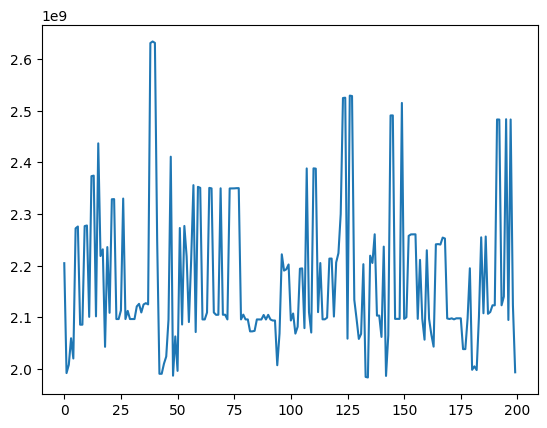

In [69]:
"""Modify and uncomment to plot 'vsize'""";
#df_mystery[#TODO].plot(kind='line')
df_mystery['vsize'].plot(kind='line')

**NOTES**:

* The vertical tick labels are in the billions (that's the meaning of `1e9` on the top left of the graph);
* The horizontal tick labels are the row labels.

Now compare these values with descriptive statistics of the `vsize` column:

In [70]:
"""Modify and uncomment to print the statistics of 'vsize' column""";
#print(df_mystery['#TODO'].describe())
print(df_mystery['vsize'].describe())

count    2.000000e+02
mean     2.175793e+09
std      1.417478e+08
min      1.983623e+09
25%      2.095809e+09
50%      2.107628e+09
75%      2.252854e+09
max      2.633560e+09
Name: vsize, dtype: float64


**QUESTIONS**:

* Take a look at the graph of `vsize` above: what is the typical app's memory usage recorded in the df_mystery dataset?
* Is that the typical value consistent with the output of the `describe()` method above?

**QUESTION**: Create another plot for the `CPU_USAGE` field. What is the typical CPU usage of the apps? (Note: 100 means 100% busy CPU)

<Axes: >

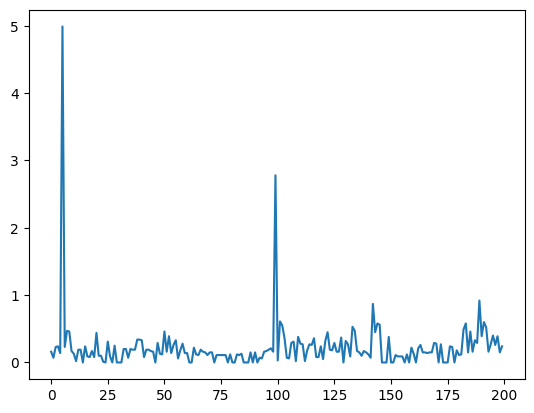

In [71]:
"""Create a line plot for `CPU_USAGE`""";
df_mystery['CPU_USAGE'].plot(kind='line')


### 4.2 Box-and-Whisker Plot 

Visualizing the descriptive statistics comes in handy when analyzing data.
A box-and-whisker plot (often shortened "*box plot*") provides a concise, graphical depiction of the minimum, maximum, median, and quartiles of the values from a set of values.
Khan academy has
<a href="https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/reading-box-and-whisker-plots" target="_blank">a tutorial video</a> that explains
all the parts of a box-and-whisker plot.

How to do this for the `vsize` column? Simply change the `kind='line'` to `kind='box'` in the plot statement above, and you're all set!

**QUESTION**: Draw the box-and-whisker plot for the `vsize` column and compare the result with the descriptive statistics above.

* Where is the median (`50%`) in this graph?
* Where are the `25%` and `75%` percentiles in this graph?
* Where are the `min` and `max` in this graph?

<Axes: >

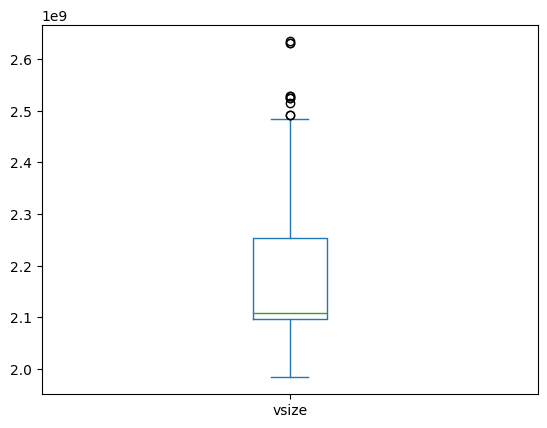

In [72]:
"""Uncomment and modify to draw a box plot of the 'vsize' data""";

#df_mystery['#TODO'].plot(kind='box')
df_mystery['vsize'].plot(kind='box')

**QUESTION**: Compare the box plot above with the raw data plot produced earlier.

* Do the values look consistent?
* Does the descriptive statistics match the raw data?

### 4.3 Visualization with `Seaborn`

**Seaborn** visualization package can produce similar plots to what _pandas_ alone can make, but with a much more robust set of capabilities and better aesthetics.
Let's try an example here for the box plot:

<Axes: xlabel='vsize'>

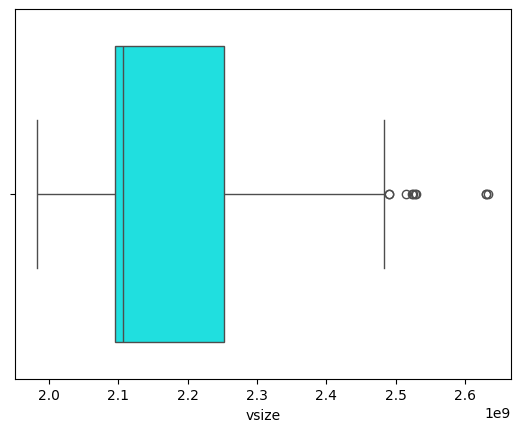

In [73]:
"""Uncomment and modify to draw a box plot of 'vsize'""";

#seaborn.boxplot(x=df_mystery['#TODO'], color='cyan')
seaborn.boxplot(x=df_mystery['vsize'], color='cyan')

<a id="sec-Summary" href="#TOC">(back to top)</a>
## 5. Summary & Further Resources

### Pandas

#### Important Notes on DataFrame Indexing

In a DataFrame, the `.loc[]` operator is the only way to select specific row(s) by the labels, as the `[]` operator is reserved to select only column(s).
The `.loc[]` operator can also be used to write new values to particular location(s) in the DataFrame.

#### References & Cheatsheets

* Our lesson page has a [summary table of the commonly used indexing syntax](https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html#summary-indexing-syntax).

* _pandas_ user's guide has a [comprehensive documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#)
on selecting and indexing data.

* _pandas_ cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Please study these resources and keep them within easy reach.
These are handy help when you are writing your own analysis pipeline using _pandas_.


### Seaborn

To learn more about `seaborn`, please visit
<a href="https://seaborn.pydata.org/tutorial.html" target="_blank">Seaborn Tutorial</a>.
Seaborn also has a 
<a href="https://seaborn.pydata.org/examples/index.html" target="_blank">gallery of examples</a>
to demonstrate what can be done with this package.
There are many sample codes to get your own visualizations started.


### Common Conventions

It is a common practice for Python programmers to shorten module names:

* `pd` for `pandas`
* `np` for `numpy`
* `plt` for `matplotlib.pyplot`
* `sns` for `seaborn`

At the beginning of a script or a notebook, they will declare:

~~~python
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
~~~

DataFrame variables often have `df` in its name---whether
`df`, `df2`, `df_mystery`, `mystery_df`, ....
The `df` part gives people a visual cue that the variable is a DataFrame object.